In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [2]:
# 取出 Ｘ特徵, y標籤
X, y = df.iloc[:, 1:-1].values , df.iloc[:, -1].values
X[:2]

array([[0.00000000e+00, 1.71000000e+02, 8.00000000e+01, 3.40000000e+01,
        2.30000000e+01, 4.35097259e+01, 1.21319135e+00, 2.10000000e+01],
       [8.00000000e+00, 9.20000000e+01, 9.30000000e+01, 4.70000000e+01,
        3.60000000e+01, 2.12405757e+01, 1.58364981e-01, 2.30000000e+01]])

In [3]:
#區分訓練與驗證數據 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import svm

In [5]:
pipe = Pipeline([ ('ss', MinMaxScaler()),                  
                  ('pca', PCA(n_components=3) ),
                  ('model',svm.SVC()) 
                ])

In [6]:
# X_train, X_test, y_train, y_test
pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', SVC())])

In [7]:
pipe.score(X_test, y_test)

0.8626666666666667

In [8]:
from sklearn.metrics import classification_report
predicted = pipe.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2014
           1       0.79      0.80      0.79       986

    accuracy                           0.86      3000
   macro avg       0.84      0.85      0.85      3000
weighted avg       0.86      0.86      0.86      3000



In [12]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=predicted)
confmat

array([[1800,  214],
       [ 198,  788]], dtype=int64)

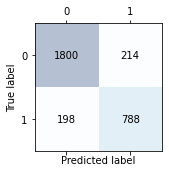

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()